# 딥러닝 강의 - softmax classification과 cnn 

In [1]:
import tensorflow as tf
import random


from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow.examples.tutorials'

In [ ]:
#데이터를 받아오자
#one hot data는 하나의 값만 True이고 나머지는 모두 False인 인코딩을 말한다.
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# softmax classification-basic NN

### 텐서플로우 노드를 만들어봅시다.

In [ ]:

#tf.float는 실수,정수등의 데이타 타입의 종류

x=tf.placeholder(tf.float32,[None,784],name='x')
y=tf.placeholder(tf.float32,[None,10],name='y')
    


### 가설함수 H(x)=Wx+b를 만들어 봅시다. 

In [ ]:
#tf.name_scope는 name scope 아래에 기능을 정의
#variable을 정의

with tf.name_scope("layer1"):
    W1=tf.Variable(tf.random_normal([784,28]),name='weight1')
    b1=tf.Variable(tf.random_normal([28]),name='bias1')
    layer1=tf.sigmoid(tf.matmul(x,W1)+b1)
    

with tf.name_scope("layer2"):
    W2=tf.Variable(tf.random_normal([28,10]),name='weight2')
    b2=tf.Variable(tf.random_normal([10]),name='bias2')
    
    #tf.matmul은 3차원 텐서 사이에서 행렬 곱을 하는 코드
    
    logits=tf.matmul(layer1,W2)+b2
    hypo=tf.nn.softmax(logits)
   

### cost함수를 만들어 봅시다

In [ ]:

with tf.name_scope("cost"):
    cost=tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y)
#cross entropy를 손실 함수(cost function)로 사용

### cost를 줄이는 optimizer로 우리가 잘 아는 경사하강법(gradient descent)을 사용합니다.

In [ ]:
#GradientDescentOptimizer는 경사하강법을 이용하는 알고리즘, cost를 줄여주는 작업에 들어감
with tf.name_scope("train"):
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

### 우리가 만든 가설함수의 정확성을 확인하기 위한 코드입니다.

In [ ]:

prediction=tf.argmax(hypo,axis=1)

is_correct=tf.equal(prediction,tf.argmax(y,1))
  
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))


### 지금까지는 가설함수와 층을 만들고, 코스트를 줄이는 방식(여기서는 경사하강법)을 정하는 등 텐서플로우 상에서 'graph를 그린 것'입니다. 
### 이제부터 할 것은 실제로 그 안에서 가설함수의 코스트를 줄이는 방향으로 학습을 진행하라는 코드를 볼 것입니다.  

In [2]:
 
with tf.Session() as sess:
    #텐서플로우의 오퍼레이션, 즉 노드를 실행하기 위한 클래스 

    iter_epoch=15
    batch_size=100
    
    #sess.run은 오퍼레이션 객체(tf.Operation)를 실행하거나 텐서 객체(tf.Tensor)의 값을 구하기 위한 주요 메커니즘
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(iter_epoch):
        avg_cost=0
        total_batch=int(mnist.train.num_examples/batch_size)
        # 나누어 떨어지지 않으면, 뒤쪽 이미지 일부는 사용하지 않는다
        # Loop over all batches 
        
        for i in range(total_batch):
            
            batch_x,batch_y=mnist.train.next_batch(batch_size)
            # batch_size만큼씩 읽어라
            
            
            c,s,_=sess.run([cost,accuracy,optimizer],feed_dict={x:batch_x,y:batch_y})
            
            avg_cost+=c/total_batch
            
            
        print("Accuracy",accuracy.eval(session=sess,feed_dict={x:mnist.test.images,y:mnist.test.labels}))
        
        r = random.randint(0, mnist.test.num_examples - 1)
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
        print("Prediction: ", sess.run(
            tf.argmax(logits, 1), feed_dict={x: mnist.test.images[r:r + 1]}))

        plt.imshow(mnist.test.images[r:r + 1].
                   reshape(28, 28), cmap='Greys', interpolation='nearest')
        plt.show()

AttributeError: module 'tensorflow' has no attribute 'Session'

# CNN

In [3]:
tf.set_random_seed(777)  
# random seed 생성

# 파라미터 
learning_rate = 0.001
training_epochs = 15
batch_size = 100


AttributeError: module 'tensorflow' has no attribute 'set_random_seed'

In [4]:
#placeholder:변수의 타입을 미리 설정해놓고 필요한 변수를 나중에 받아서 실행하는 것을 의미

keep_prob = tf.placeholder(tf.float32)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

### CNN 기본 노드들을 만들어봅시다

In [11]:

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (흑백 사진이기에, 컬러였으면 RGB로 28*28*3 이었을 것입니다)
Y = tf.placeholder(tf.float32, [None, 10])

### cnn 필터들과 다층 layer를 만들어봅시다

In [12]:

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')


L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob) 
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
'''


W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
'''


W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))

L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])

'''
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
'''

'\nTensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("Reshape_1:0", shape=(?, 2048), dtype=float32)\n'

### cnn 끝 부분에서 위에서 배웠던 softmax을 연결하여 학습시킵니다

In [13]:

W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
'''
Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
'''

W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5
'''
Tensor("add_1:0", shape=(?, 10), dtype=float32)
'''


'\nTensor("add_1:0", shape=(?, 10), dtype=float32)\n'

In [14]:

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
#AdamOptimizer는 왜 사용할까요 ?
#-> Adam method의 의 주요 장점은 stepsize가 gradient의 rescaling에 영향 받지 않는다는 것
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### 본격적인 학습을 시작합니다

In [15]:


sess = tf.Session()
#sess = tf.Session()와  위에서 쓴 with tf.Session() as sess는 동일한 의미 
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 0001 cost = 0.523530539
Epoch: 0002 cost = 0.097408769
Epoch: 0003 cost = 0.072850064
Epoch: 0004 cost = 0.057451008
Epoch: 0005 cost = 0.050928287
Epoch: 0006 cost = 0.046455198
Epoch: 0007 cost = 0.039119159
Epoch: 0008 cost = 0.038678807
Epoch: 0009 cost = 0.035540133
Epoch: 0010 cost = 0.034494487
Epoch: 0011 cost = 0.031486203
Epoch: 0012 cost = 0.028180883
Epoch: 0013 cost = 0.027664424
Epoch: 0014 cost = 0.026479798
Epoch: 0015 cost = 0.026021254
Learning Finished!


Accuracy: 0.9934
Label:  [0]
Prediction:  [0]


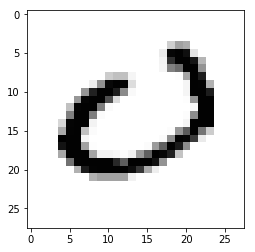

In [16]:
#correct prediction 하기 위해 각 tr.argmax를 비교하여 boolean 값을 반환


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

#random.radint : 2개의 숫자 사이의 랜덤 정수를 리턴
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()